In [1]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Net, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, plot_history, evaluate_model

c:\Users\anant\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [3]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        transforms.RandomApply(
            [
                transforms.CenterCrop(22),
            ],
            p=0.1,
        ),
        transforms.Resize((28, 28)),
        transforms.RandomRotation((-15.0, 15.0), fill=0),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [4]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(set="train", transforms=train_transforms, **kwargs)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

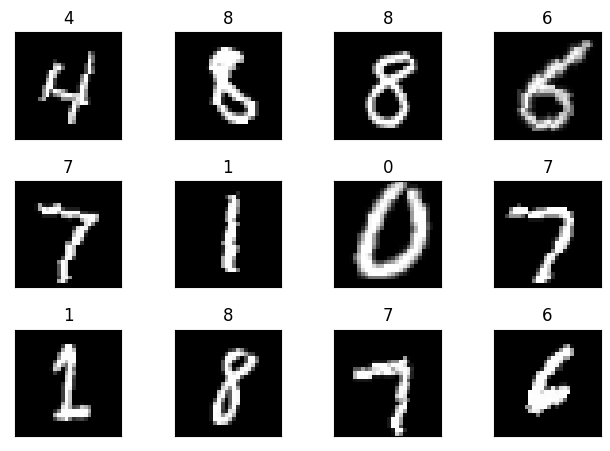

In [5]:
plot_sampledata(train_loader)

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
modelsummary(Net(), device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5           [-1, 16, 26, 26]           1,152
              ReLU-6           [-1, 16, 26, 26]               0
       BatchNorm2d-7           [-1, 16, 26, 26]              32
         Dropout2d-8           [-1, 16, 26, 26]               0
            Conv2d-9           [-1, 16, 24, 24]           2,304
             ReLU-10           [-1, 16, 24, 24]               0
      BatchNorm2d-11           [-1, 16, 24, 24]              32
        Dropout2d-12           [-1, 16, 24, 24]               0
        MaxPool2d-13           [-1, 16, 12, 12]               0
           Conv2d-14            [-1, 8,

In [7]:
num_epochs = 20
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # large learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# scheduler = None

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)
    if scheduler:
        scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4601 Batch_id=117 Accuracy=68.34: 100%|██████████| 118/118 [00:10<00:00, 11.44it/s]


Test set: Average loss: 0.2010, Accuracy: 9632/10000 (96.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1665 Batch_id=117 Accuracy=94.75: 100%|██████████| 118/118 [00:08<00:00, 14.13it/s]


Test set: Average loss: 0.0783, Accuracy: 9826/10000 (98.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1270 Batch_id=117 Accuracy=96.64: 100%|██████████| 118/118 [00:08<00:00, 14.19it/s]


Test set: Average loss: 0.0526, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1488 Batch_id=117 Accuracy=97.32: 100%|██████████| 118/118 [00:09<00:00, 12.31it/s]


Test set: Average loss: 0.0418, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0683 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [00:08<00:00, 13.69it/s]


Test set: Average loss: 0.0359, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0239 Batch_id=117 Accuracy=97.84: 100%|██████████| 118/118 [00:08<00:00, 14.09it/s]


Test set: Average loss: 0.0329, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1164 Batch_id=117 Accuracy=98.02: 100%|██████████| 118/118 [00:08<00:00, 14.11it/s]


Test set: Average loss: 0.0322, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0569 Batch_id=117 Accuracy=98.10: 100%|██████████| 118/118 [00:09<00:00, 12.72it/s]


Test set: Average loss: 0.0279, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0298 Batch_id=117 Accuracy=98.23: 100%|██████████| 118/118 [00:09<00:00, 12.84it/s]


Test set: Average loss: 0.0247, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0137 Batch_id=117 Accuracy=98.29: 100%|██████████| 118/118 [00:09<00:00, 12.31it/s]


Test set: Average loss: 0.0229, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0521 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:08<00:00, 14.04it/s]


Test set: Average loss: 0.0246, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0315 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:10<00:00, 11.28it/s]


Test set: Average loss: 0.0218, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0604 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:08<00:00, 14.09it/s]


Test set: Average loss: 0.0217, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1528 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:08<00:00, 13.53it/s]


Test set: Average loss: 0.0226, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0357 Batch_id=117 Accuracy=98.54: 100%|██████████| 118/118 [00:08<00:00, 13.51it/s]


Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0431 Batch_id=117 Accuracy=98.68: 100%|██████████| 118/118 [00:08<00:00, 13.80it/s]


Test set: Average loss: 0.0195, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0514 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:08<00:00, 14.14it/s]


Test set: Average loss: 0.0194, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0498 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:09<00:00, 12.50it/s]


Test set: Average loss: 0.0189, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0703 Batch_id=117 Accuracy=98.76: 100%|██████████| 118/118 [00:08<00:00, 13.70it/s]


Test set: Average loss: 0.0185, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0508 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:08<00:00, 13.80it/s]


Test set: Average loss: 0.0186, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.


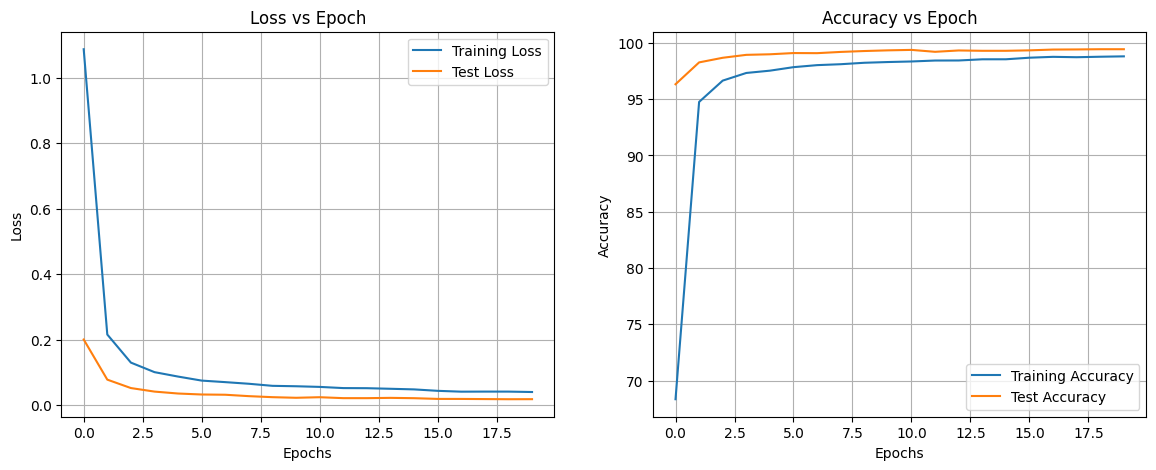

In [8]:
plot_history(
    trainer.train_losses, trainer.train_acc, trainer.test_losses, trainer.test_acc
)

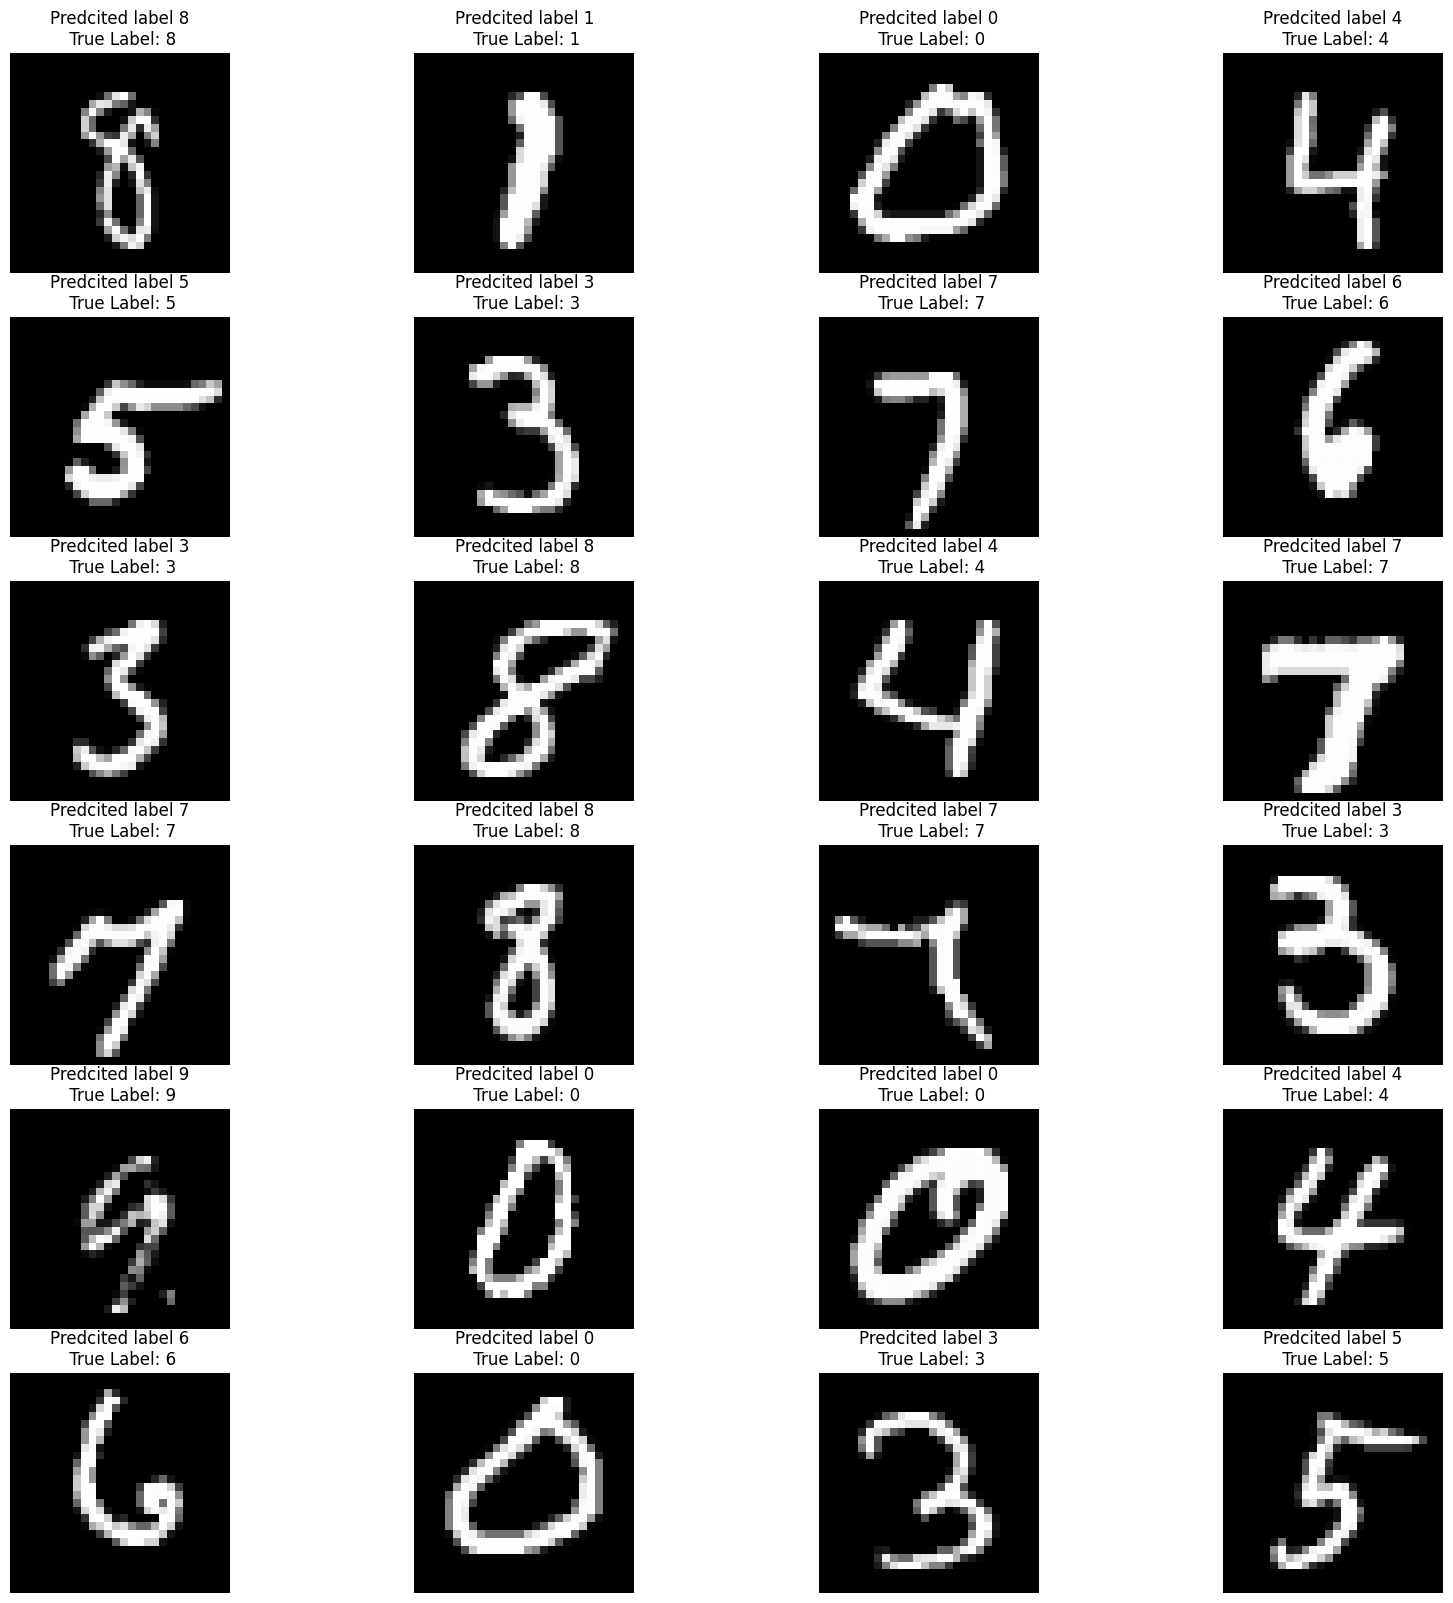

In [9]:
evaluate_model(trainer.model, test_loader, device)